# Imports

In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random as rnd
import matplotlib.image as mpimg

from scipy import stats

# Softmax Regression on MNIST

In [189]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
#from tensorflow.contrib.learn.python.learn.datasets import mnist
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [11]:
x = tf.placeholder(tf.float32, [None, 784])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)

In [12]:
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict = {x: mnist.test.images, y_: mnist.test.labels}))

0.9179


# 3.2 Multilayer Convolutional Network

In [117]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [23]:
# layer 1
W_conv1 = weight_variable([5,5,1,32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# layer 2
W_conv2 = weight_variable([5,5,32,64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# fully connected layer 1
W_fc1 = weight_variable([7*7*64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# dropout regularization
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# fully connected layer 2
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [30]:
# train and evaluate model
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y_))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())
for i in range(20000):
    batch = mnist.train.next_batch(50)
    if (i % 100 == 0):
        train_accuracy = accuracy.eval(session=sess, feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training_accuracy %g"%(i, train_accuracy))
    train_step.run(session=sess, feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
print("test accuracy %g"%accuracy.eval(session=sess, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training_accuracy 0.1
step 100, training_accuracy 0.84
step 200, training_accuracy 0.9
step 300, training_accuracy 0.96
step 400, training_accuracy 0.88
step 500, training_accuracy 0.92
step 600, training_accuracy 1
step 700, training_accuracy 0.98
step 800, training_accuracy 0.98
step 900, training_accuracy 0.9
step 1000, training_accuracy 0.88
step 1100, training_accuracy 1
step 1200, training_accuracy 0.96
step 1300, training_accuracy 0.98
step 1400, training_accuracy 0.96
step 1500, training_accuracy 0.96
step 1600, training_accuracy 0.94
step 1700, training_accuracy 0.96
step 1800, training_accuracy 0.98
step 1900, training_accuracy 0.98
step 2000, training_accuracy 1
step 2100, training_accuracy 1
step 2200, training_accuracy 1
step 2300, training_accuracy 1
step 2400, training_accuracy 1
step 2500, training_accuracy 0.94
step 2600, training_accuracy 1
step 2700, training_accuracy 0.96
step 2800, training_accuracy 1
step 2900, training_accuracy 0.98
step 3000, training_ac

# 4.1 Training Neural Networks Using TensorFlow

#1. Train a fully-connected neural network on MNIST with 64 neurons in the first hidden layer,
128 neuron in the second hidden layer and finally 10 neurons at the output corresponding to
10 different digits. Use 50 as the batch size and hinge loss as the cost function. You may use
any gradient descent type of algorithm. Report the corresponding testing accuracy

In [31]:
# hidden layer 1 - 64 neurons
W_conv1 = weight_variable([5,5,1,64])
b_conv1 = bias_variable([64])

x_image = tf.reshape(x, [-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# hidden layer 2 - 128 neurons
W_conv2 = weight_variable([5,5,64,128])
b_conv2 = bias_variable([128])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# output layer - 10 neurons
# fully connected layer 1
W_fc1 = weight_variable([7*7*128, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*128])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# dropout regularization
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# fully connected layer 2
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [32]:
# train and evaluate model
hinge_loss = tf.reduce_mean(tf.losses.hinge_loss(logits=y_conv, labels=y_))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(hinge_loss)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())
for i in range(20000):
    batch = mnist.train.next_batch(50)
    if (i % 100 == 0):
        train_accuracy = accuracy.eval(session=sess, feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training_accuracy %g"%(i, train_accuracy))
    train_step.run(session=sess, feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
print("test accuracy %g"%accuracy.eval(session=sess, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training_accuracy 0.12
step 100, training_accuracy 0.04
step 200, training_accuracy 0.06
step 300, training_accuracy 0.08
step 400, training_accuracy 0.12
step 500, training_accuracy 0.26
step 600, training_accuracy 0.22
step 700, training_accuracy 0.58
step 800, training_accuracy 0.54
step 900, training_accuracy 0.74
step 1000, training_accuracy 0.84
step 1100, training_accuracy 0.7
step 1200, training_accuracy 0.84
step 1300, training_accuracy 0.88
step 1400, training_accuracy 0.94
step 1500, training_accuracy 0.94
step 1600, training_accuracy 0.88
step 1700, training_accuracy 0.96
step 1800, training_accuracy 0.86
step 1900, training_accuracy 0.98
step 2000, training_accuracy 0.98
step 2100, training_accuracy 1
step 2200, training_accuracy 0.96
step 2300, training_accuracy 0.98
step 2400, training_accuracy 0.94
step 2500, training_accuracy 0.88
step 2600, training_accuracy 0.92
step 2700, training_accuracy 0.94
step 2800, training_accuracy 0.94
step 2900, training_accuracy 0

In [114]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

In [115]:
# fully-connected layer 1 - 64 neurons
W_fc1 = weight_variable([784,64])
b_fc1 = bias_variable([64])

h1 = tf.nn.relu(tf.matmul(x, W_fc1) + b_fc1)

# fully_connected layer 2 - 128 neurons
W_fc2 = weight_variable([64,128])
b_fc2 = bias_variable([128])

h2 = tf.nn.relu(tf.matmul(h1, W_fc2) + b_fc2)

W_out = weight_variable([128, 10])
b_out = bias_variable([10])

# dropout regularization
keep_prob = tf.placeholder(tf.float32)
h2_drop = tf.nn.dropout(h2, keep_prob)

y_fc =  tf.nn.relu(tf.matmul(h2_drop, W_out) + b_out)

In [116]:
# train and evaluate model
hinge_loss = tf.reduce_mean(tf.losses.hinge_loss(logits=y_fc, labels=y_))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(hinge_loss)
correct_prediction = tf.equal(tf.argmax(y_fc, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())
for i in range(20000):
    batch = mnist.train.next_batch(50)
    if (i % 100 == 0):
        train_accuracy = accuracy.eval(session=sess, feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training_accuracy %g"%(i, train_accuracy))
    train_step.run(session=sess, feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
print("test accuracy %g"%accuracy.eval(session=sess, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training_accuracy 0.1
step 100, training_accuracy 0.12
step 200, training_accuracy 0.1
step 300, training_accuracy 0.06
step 400, training_accuracy 0.08
step 500, training_accuracy 0.08
step 600, training_accuracy 0.06
step 700, training_accuracy 0.14
step 800, training_accuracy 0.06
step 900, training_accuracy 0.1
step 1000, training_accuracy 0.14
step 1100, training_accuracy 0.1
step 1200, training_accuracy 0.06
step 1300, training_accuracy 0.12
step 1400, training_accuracy 0.1
step 1500, training_accuracy 0.14
step 1600, training_accuracy 0.06
step 1700, training_accuracy 0.08
step 1800, training_accuracy 0.08
step 1900, training_accuracy 0.1
step 2000, training_accuracy 0.12
step 2100, training_accuracy 0.04
step 2200, training_accuracy 0.04
step 2300, training_accuracy 0.14
step 2400, training_accuracy 0.08
step 2500, training_accuracy 0.14
step 2600, training_accuracy 0.1
step 2700, training_accuracy 0.06
step 2800, training_accuracy 0.06
step 2900, training_accuracy 0.08

#2. Train a convolutional neural network on MNIST with 32 (5×5) filters with the stride of 1 in
the first hidden layer, followed by max-pooling on 2×2 non-overlapping blocks, 64 (5 × 5)
filters in the second hidden layer with the stride of 1 followed by max pooling on 2×2 blocks.
Put 10 neurons at the output corresponding to 10 different digits. Use 50 as the batch size
and cross-entropy cost function. You may use any gradient descent type of algorithm. Report
the corresponding testing accuracy.

In [4]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

In [7]:
# layer 1
W_conv1 = weight_variable([5,5,1,32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# layer 2
W_conv2 = weight_variable([5,5,32,64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])

# fully connected layer 1
W_out = weight_variable([7*7*64, 10])
b_out = bias_variable([10])

# dropout regularization
keep_prob = tf.placeholder(tf.float32)
h_pool2_flat_drop = tf.nn.dropout(h_pool2_flat, keep_prob)

y_conv = tf.nn.relu(tf.matmul(h_pool2_flat_drop, W_out) + b_out)

In [9]:
# train and evaluate model
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y_))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(20000):
    batch = mnist.train.next_batch(50)
    if (i % 100 == 0):
        train_accuracy = accuracy.eval(session=sess, feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training_accuracy %g"%(i, train_accuracy))
    train_step.run(session=sess, feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
print("test accuracy %g"%accuracy.eval(session=sess, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training_accuracy 0.1
step 100, training_accuracy 0.16
step 200, training_accuracy 0.2
step 300, training_accuracy 0.26
step 400, training_accuracy 0.52
step 500, training_accuracy 0.62
step 600, training_accuracy 0.86
step 700, training_accuracy 0.92
step 800, training_accuracy 0.8
step 900, training_accuracy 0.94
step 1000, training_accuracy 0.94
step 1100, training_accuracy 0.94
step 1200, training_accuracy 0.94
step 1300, training_accuracy 0.94
step 1400, training_accuracy 0.96
step 1500, training_accuracy 0.94
step 1600, training_accuracy 0.98
step 1700, training_accuracy 0.98
step 1800, training_accuracy 0.96
step 1900, training_accuracy 0.96
step 2000, training_accuracy 0.96
step 2100, training_accuracy 0.96
step 2200, training_accuracy 0.94
step 2300, training_accuracy 0.98
step 2400, training_accuracy 0.96
step 2500, training_accuracy 0.94
step 2600, training_accuracy 0.96
step 2700, training_accuracy 1
step 2800, training_accuracy 0.92
step 2900, training_accuracy 0.9

# 4.2 Image Denoising

#1. Load MNIST training data of size 60000 (you may want to concatenate training and validation
set if you are importing the data using TensorFlow.)

In [349]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [377]:
numextr, numpx = mnist.train.images.shape
print(numextr, numpx)

numexv, nump_1 = mnist.validation.images.shape
print(numexv, nump_1)

mnist_train = np.concatenate((mnist.train.images, mnist.validation.images), axis=0)
print(mnist_train.shape)

# for faster training
mnist_train_10k = mnist.train.next_batch(10000)

55000 784
5000 784
(60000, 784)


In [378]:
print(mnist.train.num_examples)
mnist.train._images = mnist_train_10k[0]
mnist.train._labels = mnist_train_10k[1]
mnist.train._num_examples = 10000
mnist.train._epochs_completed = 0
print(mnist.train.num_examples)

55000
10000


Didn't have enough time to train with dataset size 55,000 so tried to shrink to 10,000. Currently just call next_batch(10,000) which is random, not uniformly distributed across 10 digits. Unfortunately the mnist train dataset is randomly organized so getting 1000 of each digit is also very tedious so I'm just using next_batch

#2. Load MNIST testing data of size 10000

In [209]:
numexts, nump_0 = mnist.test.images.shape
print(numexts, nump_0)
print(mnist.test.images[0,:].shape)

10000 784
(784,)


#3. Construct and show the minimum MSE affine (MMSE affine) estimator for model X = Y +
W, where you can decide the noise type and SNR. You have already done this part in
LAB 8 for the MNIST-training data of size 10000. You may repeat your code
here and run it for the whole MNIST dataset.

In [12]:
def packcw(A,nr,nc):
    x = (A.T).reshape(nr*nc,1)
    return x

def unpackcw(x,nr,nc):
    A = x.reshape(nc,nr)
    return A.T

def packrw(A,nr,nc):
    x = A.reshape(nr*nc,1)
    return x

def unpackrw(x,nr,nc):
    A = x.reshape(nr,nc)
    return A

def Astar(SigY,sig2W):
    numpx = SigY.shape[0] 
    return np.dot(SigY,np.linalg.pinv(SigY + sig2W * np.eye(numpx)))

titlefs = 18

(784,)
muY:  (784, 1)
SigY:  (784, 784)
trace(Sigma_Y)=53.50, rank(Sigma_Y)=664


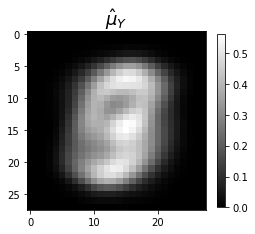

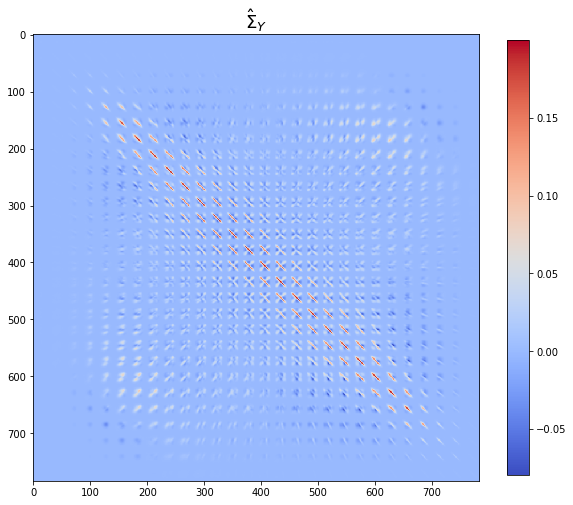

In [210]:
# compute what you need
# Select the range of data to work with
start_dig = 0
end_dig = 10
ptrtrains = start_dig*1000
ptrtraine = end_dig*1000
numsamps = ptrtraine - ptrtrains

# Find the empirical mean of the selected data
muY = np.zeros((numpx,1))
temp = np.zeros((numpx,1))
print(temp[:,0].shape)
for jj in range(ptrtrains,ptrtraine):
    temp[:,0] = mnist_train_10k[0][jj,:]
    muY = muY + temp

muY = muY/numsamps
print("muY: ", muY.shape)

# Find the empirical covariance of the selected data
SigY = np.zeros((numpx,numpx))
y = np.zeros((numpx,1))
for jj in range(ptrtrains, ptrtraine):
    y[:,0] = mnist_train_10k[0][jj,:]
    SigY = SigY + np.dot(y-muY,np.transpose(y-muY))

SigY = SigY/numsamps
print("SigY: ", SigY.shape)

EnY = np.trace(SigY) 
rankSigY = np.linalg.matrix_rank(SigY)
print('trace(Sigma_Y)=%3.2f, rank(Sigma_Y)=%d' %(EnY,rankSigY))

plt.figure(figsize=(4,4))
plt.imshow(unpackrw(muY,28,28), cmap='gray')
plt.colorbar(shrink=0.8)
plt.title('$\hat \mu_Y$', fontsize = titlefs)
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(SigY, cmap = 'coolwarm')
plt.colorbar(shrink=0.8)
plt.title('$\hat \Sigma_Y$', fontsize = titlefs)
plt.show()

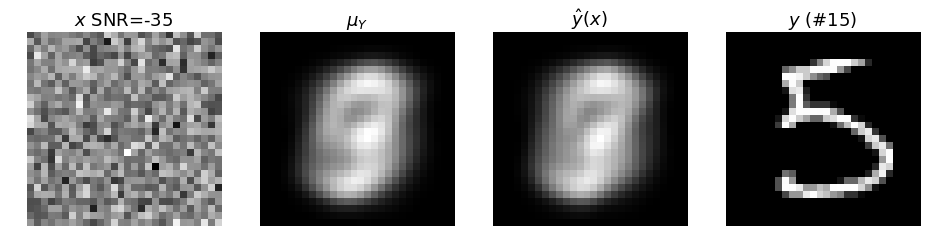

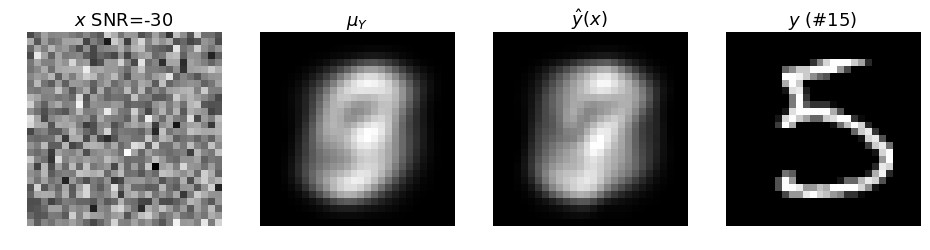

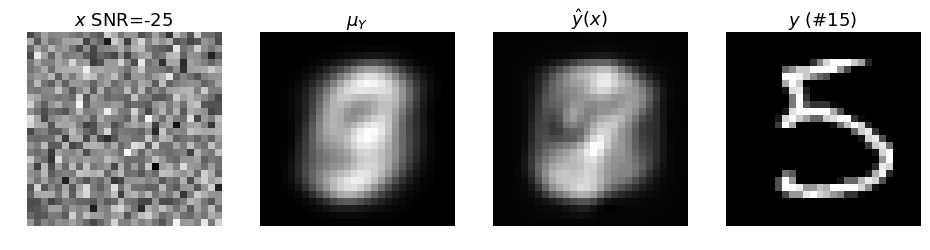

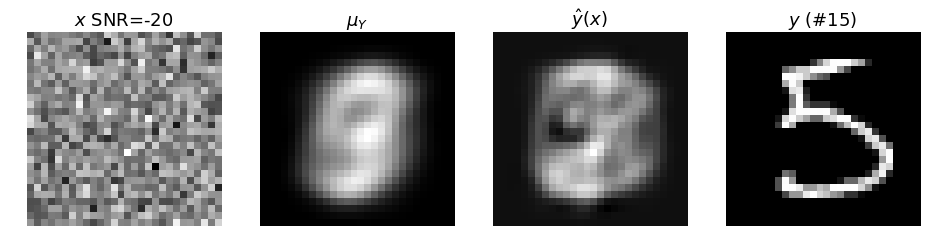

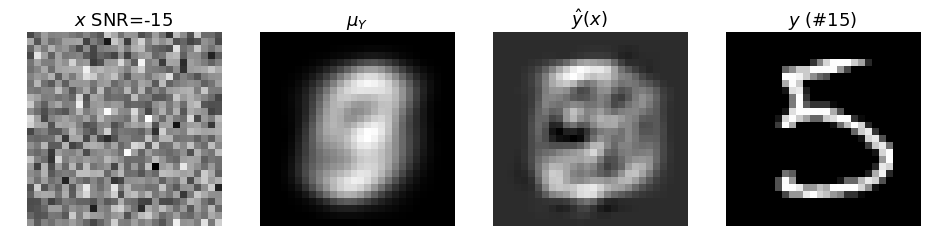

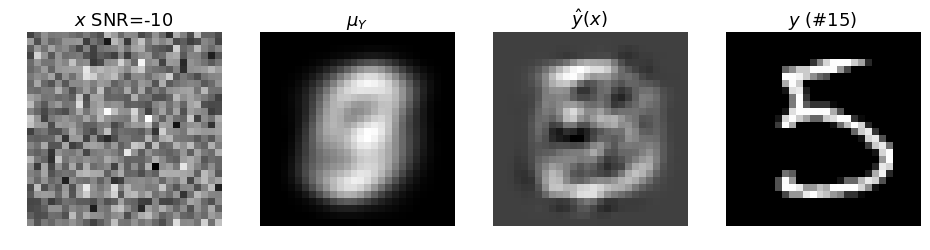

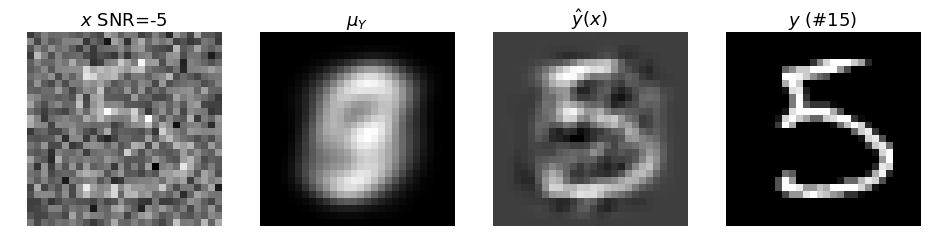

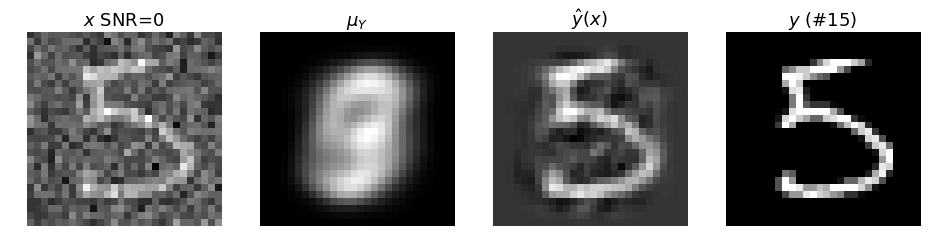

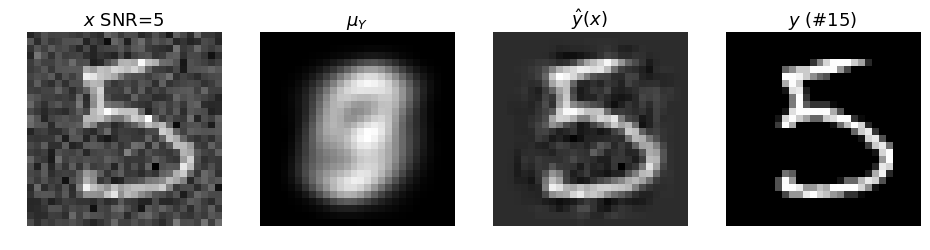

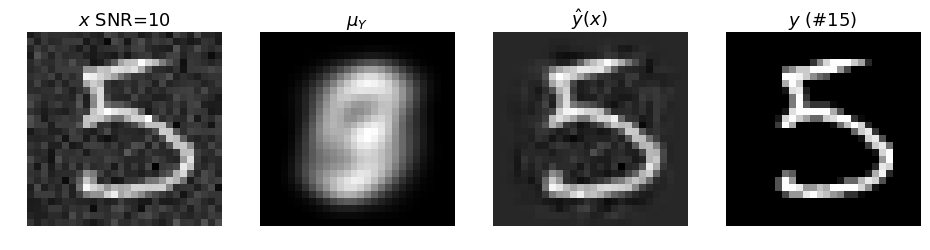

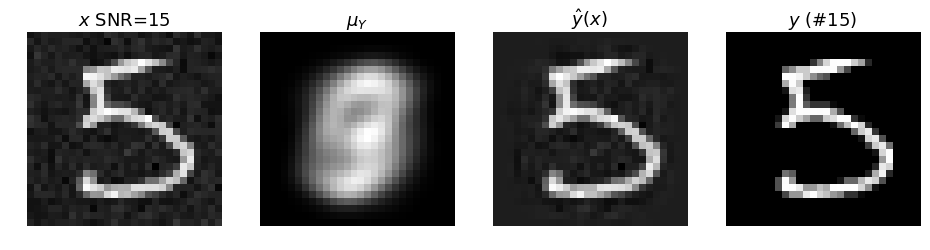

In [212]:
# Examine the effect of the SNR

# Adjustable Parameters -------
noisetype = 'g'
# integers:
SNRs = -35
SNRe =  20
# -----------------------------

muW = 0.0
ptrtests = start_dig*100
ptrteste = end_dig*100
# Select a random digit
ptr = np.random.randint(ptrtests,ptrteste)
y = np.zeros((numpx,1))
y[:,0] = mnist.test.images[ptr,:]
wg1 = np.random.normal(muW,1,(numpx,1))
wu1 = np.random.uniform(0,1,(numpx,1))
M = int((SNRe-SNRs)/5)

for kk in range(M):
    SNR = SNRs+5*kk
    sig2W = EnY/(numpx*(10**(SNR/10)))
    # Make noisy image
    if noisetype == 'u':
        sab = 2*muW
        dab = np.sqrt(12*sig2W)
        b = (sab+dab)/2.0
        a = (sab-dab)/2.0
        w = dab*(wu1-0.5) + muW
    else:
        w = np.sqrt(sig2W)*wg1
    x = y + w

    # Compute and apply Astar
    As = Astar(SigY,sig2W)
    hy = np.dot(As,x-muY) +muY

    plt.figure(figsize=(16,4))
    plt.subplot(141)
    plt.imshow(unpackrw(x, 28, 28), cmap='gray')
    plt.title('$x$ SNR=%d' %(SNR), fontsize=titlefs)
    plt.axis('off')
    plt.subplot(142)
    plt.imshow(unpackrw(muY,28,28), cmap='gray')
    plt.title('$\mu_Y$', fontsize=titlefs)
    plt.axis('off')
    plt.subplot(143)
    plt.imshow(unpackrw(hy, 28, 28), cmap='gray')
    plt.title('$\hat y(x)$', fontsize=titlefs)
    plt.axis('off')
    plt.subplot(144)
    plt.imshow(unpackrw(y, 28, 28), cmap='gray')
    plt.title('$y$ (#%d)' %(ptr), fontsize=titlefs)
    plt.axis('off') 
    plt.show()

#4. Train a fully-connected autoencoder for the model X = Y + W. You may use any architecture/learning
algorithm you prefer. Report the testing accuracy. Can you beat the MMSE
affine estimator? If so, how can you justify it? You may need to do some experiments with
a few different architectures/learning hyperparameters.

In [271]:
muW = 0.0
wg1 = np.random.normal(muW,1,(numpx,))
SNR = 5
numpx = 784

def addNoise(img):
    sig2W = EnY/(numpx*(10**(SNR/10)))
    w = np.sqrt(sig2W)*wg1
    return img + w

def noiseBatch(images):
    imgs = np.empty_like(images)
    sig2W = EnY/(numpx*(10**(SNR/10)))
    w = np.sqrt(sig2W)*wg1
    for i in range(50):
        imgs[i] = images[i] + w
    return imgs

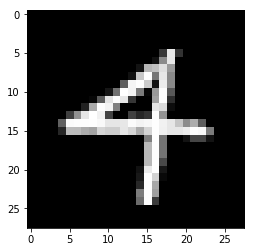

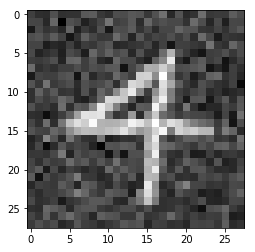

In [273]:
images = mnist.train.next_batch(50)
plt.figure()
plt.imshow(unpackrw(images[0][0], 28, 28), cmap='gray')
plt.show()

img_noisy = noiseBatch(images[0])
plt.figure()
plt.imshow(unpackrw(img_noisy[0], 28, 28), cmap='gray')
plt.show()

one hidden layer - 16 neurons

In [391]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 784])

In [393]:
# hidden layer 1 - 16 neurons
W_conv1 = weight_variable([5,5,1,16])
b_conv1 = bias_variable([16])

x_image = tf.reshape(x, [-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
h_pool1_flat = tf.reshape(h_pool1, [-1, 14*14*16])

# dropout regularization
keep_prob = tf.placeholder(tf.float32)
h_pool1_flat_drop = tf.nn.dropout(h_pool1_flat, keep_prob)

# output layer - 784 neurons
# fully connected layer 1
W_fc1 = weight_variable([14*14*16, 784])
b_fc1 = bias_variable([784])

y_conv_16 = tf.nn.relu(tf.matmul(h_pool1_flat_drop, W_fc1) + b_fc1)

In [394]:
# train and evaluate model
mse_loss = tf.losses.mean_squared_error(labels=y_, predictions=y_conv_16)
train_step = tf.train.AdamOptimizer(1e-4).minimize(mse_loss)

sess.run(tf.global_variables_initializer())
for i in range(10000):
    batch = mnist.train.next_batch(50)
    if (i % 100 == 0):
        train_mse = mse_loss.eval(session=sess, feed_dict={x: noiseBatch(batch[0]), y_: batch[0], keep_prob: 1.0})
        print("step %d, training_accuracy %g"%(i, train_mse))
    train_step.run(session=sess, feed_dict={x: noiseBatch(batch[0]), y_: batch[0], keep_prob: 0.5})
print("test accuracy %g"%mse_loss.eval(session=sess, feed_dict={x: noiseBatch(batch[0]), y_: batch[0], keep_prob: 1.0}))

step 0, training_accuracy 0.630202
step 100, training_accuracy 0.112366
step 200, training_accuracy 0.108874
step 300, training_accuracy 0.108428
step 400, training_accuracy 0.111851
step 500, training_accuracy 0.102525
step 600, training_accuracy 0.110273
step 700, training_accuracy 0.126607
step 800, training_accuracy 0.112558
step 900, training_accuracy 0.105605
step 1000, training_accuracy 0.103611
step 1100, training_accuracy 0.105761
step 1200, training_accuracy 0.106102
step 1300, training_accuracy 0.10735
step 1400, training_accuracy 0.102726
step 1500, training_accuracy 0.100348
step 1600, training_accuracy 0.086032
step 1700, training_accuracy 0.0921327
step 1800, training_accuracy 0.0865873
step 1900, training_accuracy 0.0819827
step 2000, training_accuracy 0.0813583
step 2100, training_accuracy 0.0775613
step 2200, training_accuracy 0.0681293
step 2300, training_accuracy 0.0639011
step 2400, training_accuracy 0.0561167
step 2500, training_accuracy 0.0484239
step 2600, train

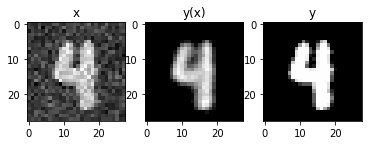

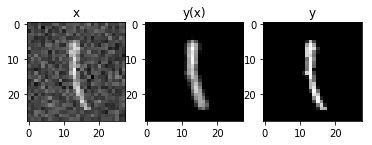

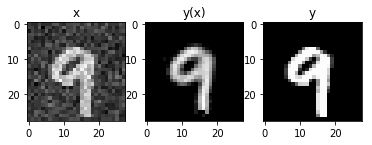

In [395]:
# ex 1
hy = y_conv_16.eval(session=sess, feed_dict={x: img_noisy[None, 0], keep_prob: 1.0})
plt.subplot(1,3,1)
plt.title('x')
plt.imshow(unpackrw(img_noisy[0], 28, 28), cmap='gray')

plt.subplot(1,3,2)
plt.title('y(x)')
plt.imshow(unpackrw(hy, 28, 28), cmap='gray')

plt.subplot(1,3,3)
plt.title('y')
plt.imshow(unpackrw(images[0][0], 28, 28), cmap='gray')
plt.show()

# ex 2
hy = y_conv_16.eval(session=sess, feed_dict={x: img_noisy[None, 1], keep_prob: 1.0})
plt.subplot(1,3,1)
plt.title('x')
plt.imshow(unpackrw(img_noisy[1], 28, 28), cmap='gray')

plt.subplot(1,3,2)
plt.title('y(x)')
plt.imshow(unpackrw(hy, 28, 28), cmap='gray')

plt.subplot(1,3,3)
plt.title('y')
plt.imshow(unpackrw(images[0][1], 28, 28), cmap='gray')
plt.show()

# ex 3
hy = y_conv_16.eval(session=sess, feed_dict={x: img_noisy[None, 2], keep_prob: 1.0})
plt.subplot(1,3,1)
plt.title('x')
plt.imshow(unpackrw(img_noisy[2], 28, 28), cmap='gray')

plt.subplot(1,3,2)
plt.title('y(x)')
plt.imshow(unpackrw(hy, 28, 28), cmap='gray')

plt.subplot(1,3,3)
plt.title('y')
plt.imshow(unpackrw(images[0][2], 28, 28), cmap='gray')
plt.show()

one hidden layer - 32 neurons

In [ ]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 784])

In [268]:
# hidden layer 1 - 32 neurons
W_conv1 = weight_variable([5,5,1,32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
h_pool1_flat = tf.reshape(h_pool1, [-1, 14*14*32])

# dropout regularization
keep_prob = tf.placeholder(tf.float32)
h_pool1_flat_drop = tf.nn.dropout(h_pool1_flat, keep_prob)

# output layer - 784 neurons
# fully connected layer 1
W_fc1 = weight_variable([14*14*32, 784])
b_fc1 = bias_variable([784])

y_conv_32 = tf.nn.relu(tf.matmul(h_pool1_flat_drop, W_fc1) + b_fc1)

In [272]:
# train and evaluate model
mse_loss = tf.losses.mean_squared_error(labels=y_, predictions=y_conv_32)
train_step = tf.train.AdamOptimizer(1e-4).minimize(mse_loss)

sess.run(tf.global_variables_initializer())
for i in range(10000):
    batch = mnist.train.next_batch(50)
    if (i % 100 == 0):
        train_mse = mse_loss.eval(session=sess, feed_dict={x: noiseBatch(batch[0]), y_: batch[0], keep_prob: 1.0})
        print("step %d, training_accuracy %g"%(i, train_mse))
    train_step.run(session=sess, feed_dict={x: noiseBatch(batch[0]), y_: batch[0], keep_prob: 0.5})
print("test accuracy %g"%mse_loss.eval(session=sess, feed_dict={x: noiseBatch(batch[0]), y_: batch[0], keep_prob: 1.0}))

step 0, training_accuracy 1.23315
step 100, training_accuracy 0.115395
step 200, training_accuracy 0.118266
step 300, training_accuracy 0.112743
step 400, training_accuracy 0.115036
step 500, training_accuracy 0.108649
step 600, training_accuracy 0.119366
step 700, training_accuracy 0.115057
step 800, training_accuracy 0.114892
step 900, training_accuracy 0.117189
step 1000, training_accuracy 0.108204
step 1100, training_accuracy 0.104899
step 1200, training_accuracy 0.115272
step 1300, training_accuracy 0.111871
step 1400, training_accuracy 0.110069
step 1500, training_accuracy 0.119331
step 1600, training_accuracy 0.110588
step 1700, training_accuracy 0.123127
step 1800, training_accuracy 0.104343
step 1900, training_accuracy 0.116878
step 2000, training_accuracy 0.111501
step 2100, training_accuracy 0.112179
step 2200, training_accuracy 0.10971
step 2300, training_accuracy 0.113612
step 2400, training_accuracy 0.121121
step 2500, training_accuracy 0.119174
step 2600, training_accura

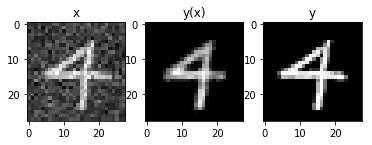

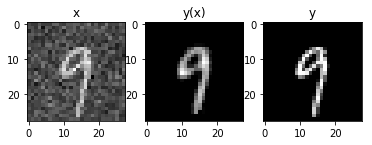

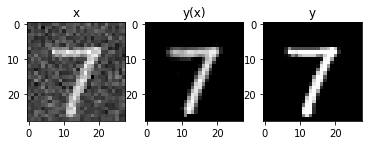

In [276]:
# ex 1
hy = y_conv_32.eval(session=sess, feed_dict={x: img_noisy[None, 0], keep_prob: 1.0})
plt.subplot(1,3,1)
plt.title('x')
plt.imshow(unpackrw(img_noisy[0], 28, 28), cmap='gray')

plt.subplot(1,3,2)
plt.title('y(x)')
plt.imshow(unpackrw(hy, 28, 28), cmap='gray')

plt.subplot(1,3,3)
plt.title('y')
plt.imshow(unpackrw(images[0][0], 28, 28), cmap='gray')
plt.show()

# ex 2
hy = y_conv_32.eval(session=sess, feed_dict={x: img_noisy[None, 1], keep_prob: 1.0})
plt.subplot(1,3,1)
plt.title('x')
plt.imshow(unpackrw(img_noisy[1], 28, 28), cmap='gray')

plt.subplot(1,3,2)
plt.title('y(x)')
plt.imshow(unpackrw(hy, 28, 28), cmap='gray')

plt.subplot(1,3,3)
plt.title('y')
plt.imshow(unpackrw(images[0][1], 28, 28), cmap='gray')
plt.show()

# ex 3
hy = y_conv_32.eval(session=sess, feed_dict={x: img_noisy[None, 2], keep_prob: 1.0})
plt.subplot(1,3,1)
plt.title('x')
plt.imshow(unpackrw(img_noisy[2], 28, 28), cmap='gray')

plt.subplot(1,3,2)
plt.title('y(x)')
plt.imshow(unpackrw(hy, 28, 28), cmap='gray')

plt.subplot(1,3,3)
plt.title('y')
plt.imshow(unpackrw(images[0][2], 28, 28), cmap='gray')
plt.show()

one hidden layer - 64 neurons

In [346]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 784])

In [347]:
# hidden layer 1 - 64 neurons
W_conv1 = weight_variable([5,5,1,64])
b_conv1 = bias_variable([64])

x_image = tf.reshape(x, [-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
h_pool1_flat = tf.reshape(h_pool1, [-1, 14*14*64])

# dropout regularization
keep_prob = tf.placeholder(tf.float32)
h_pool1_flat_drop = tf.nn.dropout(h_pool1_flat, keep_prob)

# output layer - 784 neurons
# fully connected layer 1
W_fc1 = weight_variable([14*14*64, 784])
b_fc1 = bias_variable([784])

y_conv_64 = tf.nn.relu(tf.matmul(h_pool1_flat_drop, W_fc1) + b_fc1)

In [379]:
# train and evaluate model
mse_loss = tf.losses.mean_squared_error(labels=y_, predictions=y_conv_64)
train_step = tf.train.AdamOptimizer(1e-4).minimize(mse_loss)

sess.run(tf.global_variables_initializer())
for i in range(10000):
    batch = mnist.train.next_batch(50)
    if (i % 100 == 0):
        train_mse = mse_loss.eval(session=sess, feed_dict={x: noiseBatch(batch[0]), y_: batch[0], keep_prob: 1.0})
        print("step %d, training_accuracy %g"%(i, train_mse))
    train_step.run(session=sess, feed_dict={x: noiseBatch(batch[0]), y_: batch[0], keep_prob: 0.5})
print("test accuracy %g"%mse_loss.eval(session=sess, feed_dict={x: noiseBatch(batch[0]), y_: batch[0], keep_prob: 1.0}))

step 0, training_accuracy 3.15339
step 100, training_accuracy 0.103235
step 200, training_accuracy 0.111645
step 300, training_accuracy 0.0987519
step 400, training_accuracy 0.12325
step 500, training_accuracy 0.117371
step 600, training_accuracy 0.121913
step 700, training_accuracy 0.107847
step 800, training_accuracy 0.118563
step 900, training_accuracy 0.107153
step 1000, training_accuracy 0.110797
step 1100, training_accuracy 0.118201
step 1200, training_accuracy 0.106611
step 1300, training_accuracy 0.115687
step 1400, training_accuracy 0.118671
step 1500, training_accuracy 0.111072
step 1600, training_accuracy 0.0981819
step 1700, training_accuracy 0.129266
step 1800, training_accuracy 0.104966
step 1900, training_accuracy 0.105726
step 2000, training_accuracy 0.114576
step 2100, training_accuracy 0.108067
step 2200, training_accuracy 0.110577
step 2300, training_accuracy 0.10656
step 2400, training_accuracy 0.121158
step 2500, training_accuracy 0.100124
step 2600, training_accur

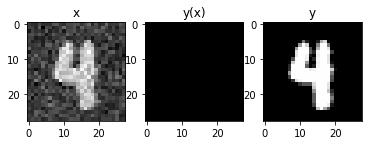

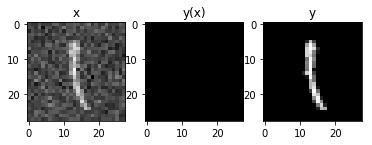

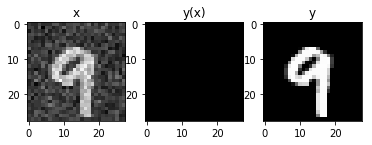

In [390]:
# ex 1
hy = y_conv_64.eval(session=sess, feed_dict={x: img_noisy[None, 0], keep_prob: 1.0})
plt.subplot(1,3,1)
plt.title('x')
plt.imshow(unpackrw(img_noisy[0], 28, 28), cmap='gray')

plt.subplot(1,3,2)
plt.title('y(x)')
plt.imshow(unpackrw(hy, 28, 28), cmap='gray')

plt.subplot(1,3,3)
plt.title('y')
plt.imshow(unpackrw(images[0][0], 28, 28), cmap='gray')
plt.show()

# ex 2
hy = y_conv_64.eval(session=sess, feed_dict={x: img_noisy[None, 1], keep_prob: 1.0})
plt.subplot(1,3,1)
plt.title('x')
plt.imshow(unpackrw(img_noisy[1], 28, 28), cmap='gray')

plt.subplot(1,3,2)
plt.title('y(x)')
plt.imshow(unpackrw(hy, 28, 28), cmap='gray')

plt.subplot(1,3,3)
plt.title('y')
plt.imshow(unpackrw(images[0][1], 28, 28), cmap='gray')
plt.show()

# ex 3
hy = y_conv_64.eval(session=sess, feed_dict={x: img_noisy[None, 2], keep_prob: 1.0})
plt.subplot(1,3,1)
plt.title('x')
plt.imshow(unpackrw(img_noisy[2], 28, 28), cmap='gray')

plt.subplot(1,3,2)
plt.title('y(x)')
plt.imshow(unpackrw(hy, 28, 28), cmap='gray')

plt.subplot(1,3,3)
plt.title('y')
plt.imshow(unpackrw(images[0][2], 28, 28), cmap='gray')
plt.show()

one hidden layer - 128 neurons

In [283]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 784])

In [286]:
# hidden layer 1 - 128 neurons
W_conv1 = weight_variable([5,5,1,128])
b_conv1 = bias_variable([128])

x_image = tf.reshape(x, [-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
h_pool1_flat = tf.reshape(h_pool1, [-1, 14*14*128])

# dropout regularization
keep_prob = tf.placeholder(tf.float32)
h_pool1_flat_drop = tf.nn.dropout(h_pool1_flat, keep_prob)

# output layer - 784 neurons
# fully connected layer 1
W_fc1 = weight_variable([14*14*128, 784])
b_fc1 = bias_variable([784])

y_conv_128 = tf.nn.relu(tf.matmul(h_pool1_flat_drop, W_fc1) + b_fc1)

In [287]:
# train and evaluate model
mse_loss = tf.losses.mean_squared_error(labels=y_, predictions=y_conv_128)
train_step = tf.train.AdamOptimizer(1e-4).minimize(mse_loss)

sess.run(tf.global_variables_initializer())
for i in range(10000):
    batch = mnist.train.next_batch(50)
    if (i % 100 == 0):
        train_mse = mse_loss.eval(session=sess, feed_dict={x: noiseBatch(batch[0]), y_: batch[0], keep_prob: 1.0})
        print("step %d, training_accuracy %g"%(i, train_mse))
    train_step.run(session=sess, feed_dict={x: noiseBatch(batch[0]), y_: batch[0], keep_prob: 0.5})
print("test accuracy %g"%mse_loss.eval(session=sess, feed_dict={x: noiseBatch(batch[0]), y_: batch[0], keep_prob: 1.0}))

step 0, training_accuracy 5.72412
step 100, training_accuracy 0.111077
step 200, training_accuracy 0.115472
step 300, training_accuracy 0.111702
step 400, training_accuracy 0.125141
step 500, training_accuracy 0.112711
step 600, training_accuracy 0.112155
step 700, training_accuracy 0.120207
step 800, training_accuracy 0.12231
step 900, training_accuracy 0.125184
step 1000, training_accuracy 0.119804
step 1100, training_accuracy 0.104905
step 1200, training_accuracy 0.127083
step 1300, training_accuracy 0.107419
step 1400, training_accuracy 0.115794
step 1500, training_accuracy 0.103595
step 1600, training_accuracy 0.122074
step 1700, training_accuracy 0.110722
step 1800, training_accuracy 0.103873
step 1900, training_accuracy 0.107896
step 2000, training_accuracy 0.109229
step 2100, training_accuracy 0.100485
step 2200, training_accuracy 0.114408
step 2300, training_accuracy 0.120242
step 2400, training_accuracy 0.109786
step 2500, training_accuracy 0.115461
step 2600, training_accura

In [396]:
# ex 1
hy = y_conv_128.eval(session=sess, feed_dict={x: img_noisy[None, 0], keep_prob: 1.0})
plt.subplot(1,3,1)
plt.title('x')
plt.imshow(unpackrw(img_noisy[0], 28, 28), cmap='gray')

plt.subplot(1,3,2)
plt.title('y(x)')
plt.imshow(unpackrw(hy, 28, 28), cmap='gray')

plt.subplot(1,3,3)
plt.title('y')
plt.imshow(unpackrw(images[0][0], 28, 28), cmap='gray')
plt.show()

# ex 2
hy = y_conv_128.eval(session=sess, feed_dict={x: img_noisy[None, 1], keep_prob: 1.0})
plt.subplot(1,3,1)
plt.title('x')
plt.imshow(unpackrw(img_noisy[1], 28, 28), cmap='gray')

plt.subplot(1,3,2)
plt.title('y(x)')
plt.imshow(unpackrw(hy, 28, 28), cmap='gray')

plt.subplot(1,3,3)
plt.title('y')
plt.imshow(unpackrw(images[0][1], 28, 28), cmap='gray')
plt.show()

# ex 3
hy = y_conv_128.eval(session=sess, feed_dict={x: img_noisy[None, 2], keep_prob: 1.0})
plt.subplot(1,3,1)
plt.title('x')
plt.imshow(unpackrw(img_noisy[2], 28, 28), cmap='gray')

plt.subplot(1,3,2)
plt.title('y(x)')
plt.imshow(unpackrw(hy, 28, 28), cmap='gray')

plt.subplot(1,3,3)
plt.title('y')
plt.imshow(unpackrw(images[0][2], 28, 28), cmap='gray')
plt.show()

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_81' with dtype float
	 [[Node: Placeholder_81 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_81', defined at:
  File "/Users/hannalu1/anaconda3/envs/tensorflow/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/hannalu1/anaconda3/envs/tensorflow/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/hannalu1/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/hannalu1/anaconda3/envs/tensorflow/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/hannalu1/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/Users/hannalu1/anaconda3/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/hannalu1/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/Users/hannalu1/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/hannalu1/anaconda3/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/hannalu1/anaconda3/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/hannalu1/anaconda3/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/hannalu1/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/hannalu1/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/hannalu1/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/hannalu1/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/Users/hannalu1/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/hannalu1/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/hannalu1/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2683, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/hannalu1/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2787, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/hannalu1/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2847, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-283-2a4fb361455d>", line 1, in <module>
    x = tf.placeholder(tf.float32, [None, 784])
  File "/Users/hannalu1/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1520, in placeholder
    name=name)
  File "/Users/hannalu1/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2149, in _placeholder
    name=name)
  File "/Users/hannalu1/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/Users/hannalu1/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2395, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/hannalu1/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1264, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_81' with dtype float
	 [[Node: Placeholder_81 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


32 neurons seems to be the best performing autoencoder for me. At 64 and 128 however the output image is black, which could mean I'm either overfitting or it could have to do with my non-evenly distributed trainset of 10,000 . 
  
Generally speaking, the neural net should outperform the MMSE because it can account for non-linearities in the image structure

#5. Plot the MSE performance versus the representation size of the corresponding autoencoder.
By representation size we mean the number of neurons in the last layer of the encoder part.

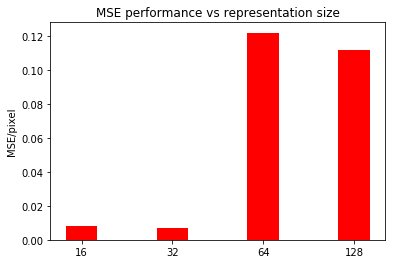

In [406]:
n_neurons = np.zeros((1,M))
n_neurons[0,0] = 32
n_neurons[0,1] = 64
n_neurons[0,2] = 128

mse = np.zeros((1,M))
mse[0,0] = 0.00695023
mse[0,1] = 0.122196
mse[0,2] = 0.112263

N = 4
mse_means = (0.007873, 0.00695023, 0.122196, 0.112263)
mse_std = (0, 0 ,0, 0)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind + width/2, mse_means, width, color='r', yerr=mse_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('MSE/pixel')
ax.set_title('MSE performance vs representation size')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('16', '32', '64', '128'))

#6. Plot MSE Performance versus SNR for MMSE affine estimator and an auto-encoder. Put
them in the same plot with different legends

In [408]:
# Plot performance curve

# Adjustable parameters --------
noisetype = 'g'
SNRs =-40
SNRe = 20
numpdig =  20 # number of test examples to use per digit
# ------------------------------

numdig = end_dig - start_dig
M = int((SNRe-SNRs)/2)
testSNR = np.zeros((1,M))
testmse = np.zeros((1,M))
testster = np.zeros((1,M))
mseth = np.zeros((1,M))
tempmse = np.zeros((1,numpdig*numdig))
y = np.zeros((numpx,1))
muW = 0.0

for kk in range(M):
    testSNR[0,kk] = SNRs + 2*kk
    sig2W = EnY/(numpx*10**(testSNR[0,kk]/10))
    As = Astar(SigY,sig2W)
    mseth[0,kk] = np.trace( (np.eye(numpx) - 2*As + (As.dot(As))).dot(SigY) + sig2W*As.dot(As.T))/numpx  
    for jj in range(numdig):
        for mm in range(numpdig):
            if noisetype == 'u':
                sab = 2*muW
                dab = np.sqrt(12*sig2W)
                b = (sab+dab)/2.0
                a = (sab-dab)/2.0
                w = np.random.uniform(a,b,(numpx,1))
            else:
                w = np.random.normal(muW,np.sqrt(sig2W),(numpx,1))
                
            y[:,0] = mnist.train.images[jj*100 + mm,:]
            x = y + w
            hy = np.dot(As,x-muY) + muY
            tempmse[0, numpdig*jj + mm] = (y-hy).T.dot(y-hy)
            
    # find mean        
    testmse[0,kk] = tempmse.mean()/numpx
    # find standard error
    testster[0,kk] = sp.stats.sem(tempmse[0,:])/numpx

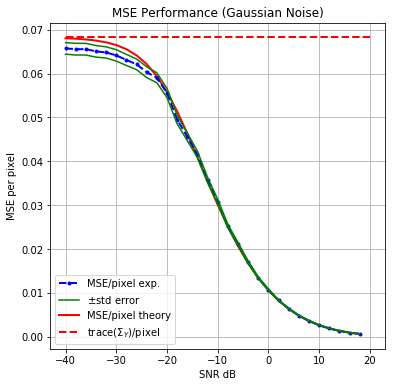

In [409]:
# Plot the figure
plt.figure(figsize=(6,6))
thmse_line, = plt.plot(testSNR[0,:], mseth[0,:],'r-',linewidth=2, label='MSE/pixel theory')
exmse_line, = plt.plot(testSNR[0,:],testmse[0,:],'b.--',linewidth=2, label='MSE/pixel exp.')
stderr_line, = plt.plot(testSNR[0,:],testmse[0,:] + testster[0,:], 'g-', label='std error')
plt.plot(testSNR[0,:],testmse[0,:] - testster[0,:], 'g-')
limit_line, = plt.plot([SNRs, SNRe],[EnY/numpx, EnY/numpx],'r--',linewidth=2, label='trace($\Sigma_Y$)/pixel')
plt.legend([exmse_line, stderr_line, thmse_line, limit_line], ['MSE/pixel exp.', '$\pm$std error', 'MSE/pixel theory', 'trace($\Sigma_Y$)/pixel'], loc=3)
plt.grid('on')
plt.xlabel('SNR dB')
plt.ylabel('MSE per pixel')
if noisetype == 'u':
    plt.title('MSE Performance (uniform noise)')
else:
    plt.title('MSE Performance (Gaussian Noise)')
plt.show()      
            

# 4.3 Box Occlusions

#1. Write a general function that computes the MMSE affine estimator to estimate the hidden
part of an image given covariance of Y and the indices of the hidden part. You have already
done this part in LAB 8 for the MNIST-training data of size 10000. You may
repeat your code here and run it for the whole MNIST dataset

In [302]:
# returns array of hidden indices that form a square with side length window in an nxn image
def middle(n, window):
    N = n*n
    mid = int(n/2)
    lo = int(mid - window/2)
    hi = int(mid + window/2)
    
    hidden = []
    for i in range(lo*n, hi*n, n):
        for j in range(i+lo, i+hi):
            hidden.append(j)
    return hidden

# returns an image with its elements hidden according to a list of indices hidden
def hide(img, hidden):
    img_new = np.copy(img)
    for i in range(0, len(hidden)):
        img_new[hidden[i]] = 0
    return img_new

# returns an estimated image based on its MSE 
def hidden_MSE(img, muY, SigY, hidden):
    # permutation matrix
    P = np.zeros(shape=[784, 784], dtype='float64')
    n_hidden = len(hidden)
    n_total = len(img)
    start = n_total - n_hidden
    
    isHidden = np.zeros(shape=[784, 1], dtype='int')
    for i in hidden:
        isHidden[i] = 1
    
    hidden_offset = 0
    seen_offset = 0
    img_seen = np.zeros(shape=[start,1], dtype='float64')
    for i in range(784):
        if (isHidden[i]):
            P[start+hidden_offset, i] = 1
            hidden_offset += 1
        else:
            P[seen_offset, i] = 1
            img_seen[seen_offset, 0] = img[i, 0]
            seen_offset += 1

    # permute mean and covariance
    muY_new = P.dot(muY)
    muY_1 = muY_new[:start]
    muY_2 = muY_new[start:n_total]
    
    SigY_new = P.dot(SigY.dot(np.transpose(P)))
    SigY_1 = SigY_new[:start, :start]
    SigY_21 = SigY_new[start:n_total, :start]
    
    Astar = SigY_21.dot(np.linalg.pinv(SigY_1))
    
    # y2(y1) = E21 E1^-1 (y1-mean1) + mean2
    img_new = np.zeros(shape=[784,1], dtype='float64')
    img_new[:start] = img_seen
    img_new[start:n_total] = Astar.dot(img_seen - muY_1) + muY_2
    
    img_new = np.dot(np.linalg.inv(P), img_new)
    return img_new

def hiddenBatch(images, hidden):
    imgs = np.empty_like(images)
    for i in range(50):
        imgs[i] = hide(images[i], hidden)
    return imgs

[232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551]


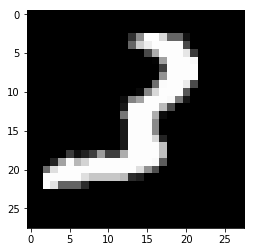

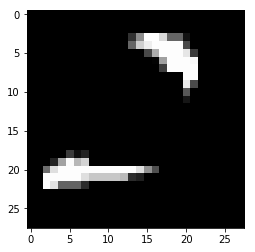

In [317]:
hidden = middle(28, 12)
print(hidden)
images = mnist.train.next_batch(50)
plt.figure()
plt.imshow(unpackrw(images[0][5], 28, 28), cmap='gray')
plt.show()

img_hidden = hiddenBatch(images[0], hidden)
plt.figure()
plt.imshow(unpackrw(img_hidden[5], 28, 28), cmap='gray')
plt.show()

#2. Hide a k×k square at the center of the training images (choose an arbitrary k) and display
the MMSE affine estimator. Report the testing performance.

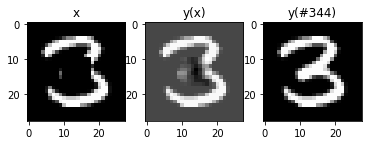

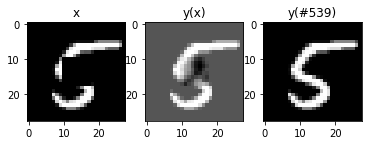

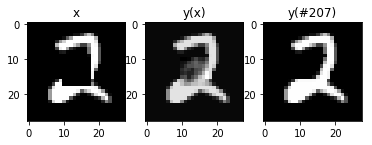

In [294]:
r = np.random.rand(1, 3)
i1 = int(r[0, 0]*1000)
i2 = int(r[0, 1]*1000)
i3 = int(r[0, 2]*1000)

img_1 = np.zeros(shape=[784, 1], dtype='float64')
img_2 = np.zeros(shape=[784, 1], dtype='float64')
img_3 = np.zeros(shape=[784, 1], dtype='float64')

img_1[:, 0] = testset[:, i1]
img_2[:, 0] = testset[:, i2]
img_3[:, 0] = testset[:, i3]

# minimum MSE affine estimate
hidden = middle(28, 8)

img_1 = hide(img_1, hidden)
img_2 = hide(img_2, hidden)
img_3 = hide(img_3, hidden)

img_1_est = hidden_MSE(img_1, muY, SigY, hidden)
img_2_est = hidden_MSE(img_2, muY, SigY, hidden)
img_3_est = hidden_MSE(img_3, muY, SigY, hidden)

# img 1
plt.subplot(1,3,1)
plt.title('x')
plt.imshow(unpackcw(img_1, 28,28), cmap='gray')

plt.subplot(1,3,2)
plt.title('y(x)')
plt.imshow(unpackcw(img_1_est, 28,28), cmap='gray')

plt.subplot(1,3,3)
plt.title('y(#{})'.format(i1))
plt.imshow(np.reshape(testset[:, i1], [28,28], order='F'), cmap='gray')
plt.show()

# img 2
plt.subplot(1,3,1)
plt.title('x')
plt.imshow(np.reshape(img_2, [28,28], order='F'), cmap='gray')

plt.subplot(1,3,2)
plt.title('y(x)')
plt.imshow(np.reshape(img_2_est, [28,28], order='F'), cmap='gray')

plt.subplot(1,3,3)
plt.title('y(#{})'.format(i2))
plt.imshow(np.reshape(testset[:, i2], [28,28], order='F'), cmap='gray')
plt.show()

# img 3
plt.subplot(1,3,1)
plt.title('x')
plt.imshow(np.reshape(img_3, [28,28], order='F'), cmap='gray')

plt.subplot(1,3,2)
plt.title('y(x)')
plt.imshow(np.reshape(img_3_est, [28,28], order='F'), cmap='gray')

plt.subplot(1,3,3)
plt.title('y(#{})'.format(i3))
plt.imshow(np.reshape(testset[:, i3], [28,28], order='F'), cmap='gray')
plt.show()

In [ ]:
for i in range(len(hidden)):
    
# Adustable Parameters ---------
numpdig = 20
# ------------------------------

testmseL = np.zeros((1,28))
testmseR = np.zeros((1,28))
teststerL = np.zeros((1,28))
teststerR = np.zeros((1,28))
mseth = np.zeros((1,28))
numdig = end_dig - start_dig
tempmseL = np.zeros((1,numpdig*numdig))
tempmseR = np.zeros((1,numpdig*numdig))
y = np.zeros((numpx,1))
cut = np.arange(0,28,1)

xL = np.zeros((numpx,1))
xR = np.zeros((numpx,1))


for ii in range(1,27):
    pp = 28*ii
    #AsR = AstarR(SigY,pp)
    AsL = AstarL(SigY,pp)
    mseth[0,ii] = np.trace( (np.eye(numpx) - 2*AsL + (AsL.dot(AsL))).dot(SigY) )/numpx

    for jj in range(numdig):
        for mm in range(numpdig):
            y[:,0] = mnist.test.images[jj*100 + mm,:]
            xL[0:pp,0] = y[0:pp,0]
            xL[pp:numpx,0] = 0.0
            xR[0:pp,0] = 0.0
            xR[pp:numpx,0] = y[pp:numpx,0]
        
            hyL = AsL.dot(xL-muY) + muY
            #hyR = AsR.dot(xR-muY) + muY
            tempmseL[0, numpdig*jj + mm] = (y-hyL).T.dot(y-hyL)
            #tempmseR[0, numpdig*jj + mm] = (y-hyR).T.dot(y-hyR)         
            
    testmseL[0,ii] = tempmseL.mean()/numpx
    teststerL[0,ii] = sp.stats.sem(tempmseL[0,:])/numpx

#3. Train an auto-encoder to restore the full image. Report the corresponding testing accuracy.
Can an autoencoder beat a MMSE affine estimator?

In [321]:
hidden = middle(28, 8)

In [319]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 784])

In [320]:
# hidden layer 1 - 64 neurons
W_conv1 = weight_variable([5,5,1,64])
b_conv1 = bias_variable([64])

x_image = tf.reshape(x, [-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
h_pool1_flat = tf.reshape(h_pool1, [-1, 14*14*64])

# dropout regularization
keep_prob = tf.placeholder(tf.float32)
h_pool1_flat_drop = tf.nn.dropout(h_pool1_flat, keep_prob)

# output layer - 784 neurons
# fully connected layer 1
W_fc1 = weight_variable([14*14*64, 784])
b_fc1 = bias_variable([784])

y_conv_occ_64 = tf.nn.relu(tf.matmul(h_pool1_flat_drop, W_fc1) + b_fc1)

In [307]:
# train and evaluate model
mse_loss = tf.losses.mean_squared_error(labels=y_, predictions=y_conv_occ_64)
train_step = tf.train.AdamOptimizer(1e-4).minimize(mse_loss)

sess.run(tf.global_variables_initializer())
for i in range(10000):
    batch = mnist.train.next_batch(50)
    if (i % 100 == 0):
        train_mse = mse_loss.eval(session=sess, feed_dict={x: hiddenBatch(batch[0], hidden), y_: batch[0], keep_prob: 1.0})
        print("step %d, training_accuracy %g"%(i, train_mse))
    train_step.run(session=sess, feed_dict={x: hiddenBatch(batch[0], hidden), y_: batch[0], keep_prob: 0.5})
print("test accuracy %g"%mse_loss.eval(session=sess, feed_dict={x: hiddenBatch(batch[0], hidden), y_: batch[0], keep_prob: 1.0}))

step 0, training_accuracy 1.67946
step 100, training_accuracy 0.125298
step 200, training_accuracy 0.117085
step 300, training_accuracy 0.117292
step 400, training_accuracy 0.124229
step 500, training_accuracy 0.11679
step 600, training_accuracy 0.119189
step 700, training_accuracy 0.123272
step 800, training_accuracy 0.116587
step 900, training_accuracy 0.105271
step 1000, training_accuracy 0.123958
step 1100, training_accuracy 0.109736
step 1200, training_accuracy 0.113096
step 1300, training_accuracy 0.106913
step 1400, training_accuracy 0.111519
step 1500, training_accuracy 0.111035
step 1600, training_accuracy 0.117473
step 1700, training_accuracy 0.112392
step 1800, training_accuracy 0.119019
step 1900, training_accuracy 0.125708
step 2000, training_accuracy 0.115327
step 2100, training_accuracy 0.118105
step 2200, training_accuracy 0.128571
step 2300, training_accuracy 0.110963
step 2400, training_accuracy 0.116398
step 2500, training_accuracy 0.109817
step 2600, training_accura

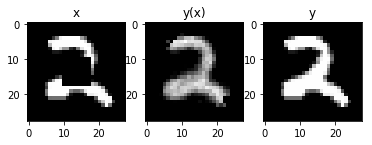

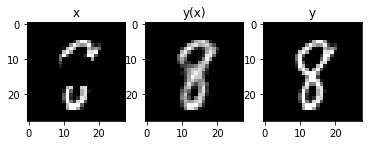

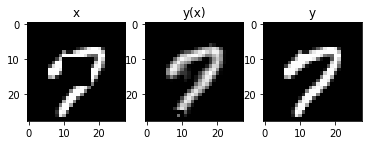

In [308]:
# ex 1
hy = y_conv_occ_64.eval(session=sess, feed_dict={x: img_hidden[None, 0], keep_prob: 1.0})
plt.subplot(1,3,1)
plt.title('x')
plt.imshow(unpackrw(img_hidden[0], 28, 28), cmap='gray')

plt.subplot(1,3,2)
plt.title('y(x)')
plt.imshow(unpackrw(hy, 28, 28), cmap='gray')

plt.subplot(1,3,3)
plt.title('y')
plt.imshow(unpackrw(images[0][0], 28, 28), cmap='gray')
plt.show()

# ex 2
hy = y_conv_occ_64.eval(session=sess, feed_dict={x: img_hidden[None, 1], keep_prob: 1.0})
plt.subplot(1,3,1)
plt.title('x')
plt.imshow(unpackrw(img_hidden[1], 28, 28), cmap='gray')

plt.subplot(1,3,2)
plt.title('y(x)')
plt.imshow(unpackrw(hy, 28, 28), cmap='gray')

plt.subplot(1,3,3)
plt.title('y')
plt.imshow(unpackrw(images[0][1], 28, 28), cmap='gray')
plt.show()

# ex 3
hy = y_conv_occ_64.eval(session=sess, feed_dict={x: img_hidden[None, 2], keep_prob: 1.0})
plt.subplot(1,3,1)
plt.title('x')
plt.imshow(unpackrw(img_hidden[2], 28, 28), cmap='gray')

plt.subplot(1,3,2)
plt.title('y(x)')
plt.imshow(unpackrw(hy, 28, 28), cmap='gray')

plt.subplot(1,3,3)
plt.title('y')
plt.imshow(unpackrw(images[0][2], 28, 28), cmap='gray')
plt.show()

The autocoder clearly does a better job qualitatively looking at the reconstructions above so yes it can beat the MMSE affine estimator, once again because of its ability to capture non-linearities

#4. In this part, we will investigate the impact of varying k (size of the occluded square) on
the MSE performance. Plot the MSE performance versus k for the affine estimator and the
autoencoder.

k = 12

In [322]:
hidden = middle(28, 12)

In [323]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 784])

In [324]:
# hidden layer 1 - 64 neurons
W_conv1 = weight_variable([5,5,1,64])
b_conv1 = bias_variable([64])

x_image = tf.reshape(x, [-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
h_pool1_flat = tf.reshape(h_pool1, [-1, 14*14*64])

# dropout regularization
keep_prob = tf.placeholder(tf.float32)
h_pool1_flat_drop = tf.nn.dropout(h_pool1_flat, keep_prob)

# output layer - 784 neurons
# fully connected layer 1
W_fc1 = weight_variable([14*14*64, 784])
b_fc1 = bias_variable([784])

y_conv_occ12_64 = tf.nn.relu(tf.matmul(h_pool1_flat_drop, W_fc1) + b_fc1)

In [325]:
# train and evaluate model
mse_loss = tf.losses.mean_squared_error(labels=y_, predictions=y_conv_occ12_64)
train_step = tf.train.AdamOptimizer(1e-4).minimize(mse_loss)

sess.run(tf.global_variables_initializer())
for i in range(10000):
    batch = mnist.train.next_batch(50)
    if (i % 100 == 0):
        train_mse = mse_loss.eval(session=sess, feed_dict={x: hiddenBatch(batch[0], hidden), y_: batch[0], keep_prob: 1.0})
        print("step %d, training_accuracy %g"%(i, train_mse))
    train_step.run(session=sess, feed_dict={x: hiddenBatch(batch[0], hidden), y_: batch[0], keep_prob: 0.5})
print("test accuracy %g"%mse_loss.eval(session=sess, feed_dict={x: hiddenBatch(batch[0], hidden), y_: batch[0], keep_prob: 1.0}))

step 0, training_accuracy 1.29769
step 100, training_accuracy 0.118907
step 200, training_accuracy 0.109383
step 300, training_accuracy 0.108108
step 400, training_accuracy 0.112378
step 500, training_accuracy 0.110534
step 600, training_accuracy 0.115835
step 700, training_accuracy 0.120233
step 800, training_accuracy 0.112563
step 900, training_accuracy 0.117959
step 1000, training_accuracy 0.109952
step 1100, training_accuracy 0.11215
step 1200, training_accuracy 0.117785
step 1300, training_accuracy 0.126719
step 1400, training_accuracy 0.12095
step 1500, training_accuracy 0.130556
step 1600, training_accuracy 0.11003
step 1700, training_accuracy 0.128995
step 1800, training_accuracy 0.115247
step 1900, training_accuracy 0.112166
step 2000, training_accuracy 0.107128
step 2100, training_accuracy 0.108213
step 2200, training_accuracy 0.11577
step 2300, training_accuracy 0.11029
step 2400, training_accuracy 0.124259
step 2500, training_accuracy 0.114278
step 2600, training_accuracy 0

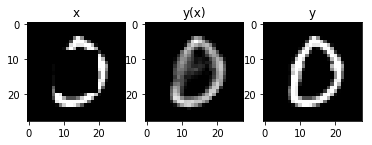

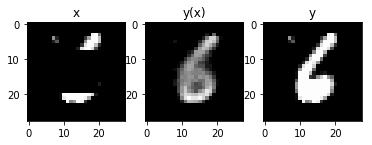

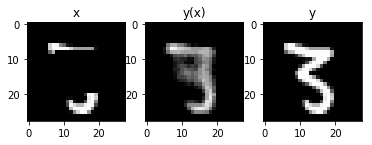

In [326]:
# ex 1
hy = y_conv_occ12_64.eval(session=sess, feed_dict={x: img_hidden[None, 0], keep_prob: 1.0})
plt.subplot(1,3,1)
plt.title('x')
plt.imshow(unpackrw(img_hidden[0], 28, 28), cmap='gray')

plt.subplot(1,3,2)
plt.title('y(x)')
plt.imshow(unpackrw(hy, 28, 28), cmap='gray')

plt.subplot(1,3,3)
plt.title('y')
plt.imshow(unpackrw(images[0][0], 28, 28), cmap='gray')
plt.show()

# ex 2
hy = y_conv_occ12_64.eval(session=sess, feed_dict={x: img_hidden[None, 1], keep_prob: 1.0})
plt.subplot(1,3,1)
plt.title('x')
plt.imshow(unpackrw(img_hidden[1], 28, 28), cmap='gray')

plt.subplot(1,3,2)
plt.title('y(x)')
plt.imshow(unpackrw(hy, 28, 28), cmap='gray')

plt.subplot(1,3,3)
plt.title('y')
plt.imshow(unpackrw(images[0][1], 28, 28), cmap='gray')
plt.show()

# ex 3
hy = y_conv_occ12_64.eval(session=sess, feed_dict={x: img_hidden[None, 2], keep_prob: 1.0})
plt.subplot(1,3,1)
plt.title('x')
plt.imshow(unpackrw(img_hidden[2], 28, 28), cmap='gray')

plt.subplot(1,3,2)
plt.title('y(x)')
plt.imshow(unpackrw(hy, 28, 28), cmap='gray')

plt.subplot(1,3,3)
plt.title('y')
plt.imshow(unpackrw(images[0][2], 28, 28), cmap='gray')
plt.show()

k = 16

[174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 510, 511, 512, 513, 514, 515, 516, 517,

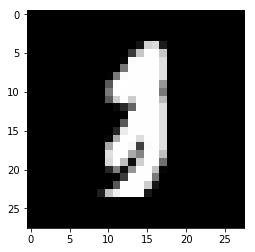

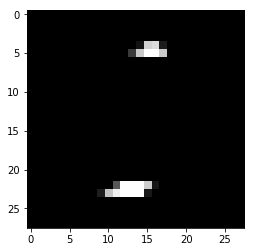

In [327]:
hidden = middle(28, 16)
print(hidden)
images = mnist.train.next_batch(50)
plt.figure()
plt.imshow(unpackrw(images[0][5], 28, 28), cmap='gray')
plt.show()

img_hidden = hiddenBatch(images[0], hidden)
plt.figure()
plt.imshow(unpackrw(img_hidden[5], 28, 28), cmap='gray')
plt.show()

In [328]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 784])

In [329]:
# hidden layer 1 - 64 neurons
W_conv1 = weight_variable([5,5,1,64])
b_conv1 = bias_variable([64])

x_image = tf.reshape(x, [-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
h_pool1_flat = tf.reshape(h_pool1, [-1, 14*14*64])

# dropout regularization
keep_prob = tf.placeholder(tf.float32)
h_pool1_flat_drop = tf.nn.dropout(h_pool1_flat, keep_prob)

# output layer - 784 neurons
# fully connected layer 1
W_fc1 = weight_variable([14*14*64, 784])
b_fc1 = bias_variable([784])

y_conv_occ16_64 = tf.nn.relu(tf.matmul(h_pool1_flat_drop, W_fc1) + b_fc1)

In [330]:
# train and evaluate model
mse_loss = tf.losses.mean_squared_error(labels=y_, predictions=y_conv_occ16_64)
train_step = tf.train.AdamOptimizer(1e-4).minimize(mse_loss)

sess.run(tf.global_variables_initializer())
for i in range(10000):
    batch = mnist.train.next_batch(50)
    if (i % 100 == 0):
        train_mse = mse_loss.eval(session=sess, feed_dict={x: hiddenBatch(batch[0], hidden), y_: batch[0], keep_prob: 1.0})
        print("step %d, training_accuracy %g"%(i, train_mse))
    train_step.run(session=sess, feed_dict={x: hiddenBatch(batch[0], hidden), y_: batch[0], keep_prob: 0.5})
print("test accuracy %g"%mse_loss.eval(session=sess, feed_dict={x: hiddenBatch(batch[0], hidden), y_: batch[0], keep_prob: 1.0}))

step 0, training_accuracy 0.840735
step 100, training_accuracy 0.101095
step 200, training_accuracy 0.109529
step 300, training_accuracy 0.115143
step 400, training_accuracy 0.108038
step 500, training_accuracy 0.114975
step 600, training_accuracy 0.122255
step 700, training_accuracy 0.116043
step 800, training_accuracy 0.112848
step 900, training_accuracy 0.121518
step 1000, training_accuracy 0.125208
step 1100, training_accuracy 0.119088
step 1200, training_accuracy 0.122259
step 1300, training_accuracy 0.118648
step 1400, training_accuracy 0.106422
step 1500, training_accuracy 0.107863
step 1600, training_accuracy 0.117844
step 1700, training_accuracy 0.117024
step 1800, training_accuracy 0.121024
step 1900, training_accuracy 0.110026
step 2000, training_accuracy 0.106395
step 2100, training_accuracy 0.111576
step 2200, training_accuracy 0.112352
step 2300, training_accuracy 0.127253
step 2400, training_accuracy 0.100969
step 2500, training_accuracy 0.116908
step 2600, training_accu

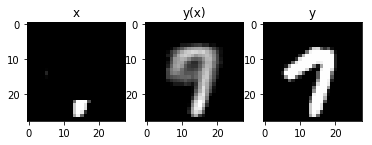

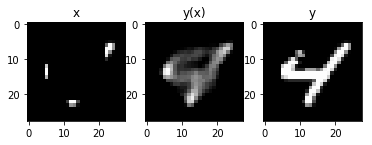

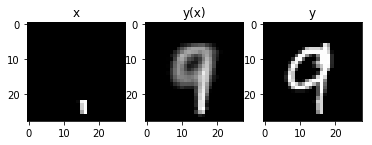

In [331]:
# ex 1
hy = y_conv_occ16_64.eval(session=sess, feed_dict={x: img_hidden[None, 0], keep_prob: 1.0})
plt.subplot(1,3,1)
plt.title('x')
plt.imshow(unpackrw(img_hidden[0], 28, 28), cmap='gray')

plt.subplot(1,3,2)
plt.title('y(x)')
plt.imshow(unpackrw(hy, 28, 28), cmap='gray')

plt.subplot(1,3,3)
plt.title('y')
plt.imshow(unpackrw(images[0][0], 28, 28), cmap='gray')
plt.show()

# ex 2
hy = y_conv_occ16_64.eval(session=sess, feed_dict={x: img_hidden[None, 1], keep_prob: 1.0})
plt.subplot(1,3,1)
plt.title('x')
plt.imshow(unpackrw(img_hidden[1], 28, 28), cmap='gray')

plt.subplot(1,3,2)
plt.title('y(x)')
plt.imshow(unpackrw(hy, 28, 28), cmap='gray')

plt.subplot(1,3,3)
plt.title('y')
plt.imshow(unpackrw(images[0][1], 28, 28), cmap='gray')
plt.show()

# ex 3
hy = y_conv_occ16_64.eval(session=sess, feed_dict={x: img_hidden[None, 2], keep_prob: 1.0})
plt.subplot(1,3,1)
plt.title('x')
plt.imshow(unpackrw(img_hidden[2], 28, 28), cmap='gray')

plt.subplot(1,3,2)
plt.title('y(x)')
plt.imshow(unpackrw(hy, 28, 28), cmap='gray')

plt.subplot(1,3,3)
plt.title('y')
plt.imshow(unpackrw(images[0][2], 28, 28), cmap='gray')
plt.show()

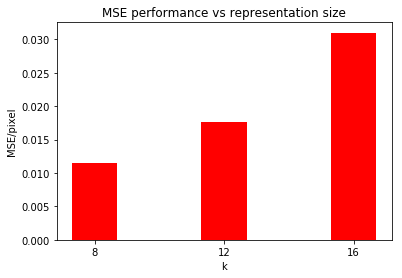

In [412]:
N = 3
mse_means = (0.011522, 0.01767, 0.031)
mse_std = (0, 0 ,0)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind + width/2, mse_means, width, color='r', yerr=mse_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('MSE/pixel')
ax.set_xlabel('k')
ax.set_title('MSE performance vs representation size')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('8', '12', '16'))
plt.show()

In [337]:
def AstarL(SigY,pp):
    numpx = SigY.shape[0]
    Sig11 = SigY[0:pp,0:pp]
    Sig21 = SigY[pp:numpx,0:pp]
    D = np.zeros((numpx, numpx))
    D[0:pp,0:pp] = np.eye(pp)
    D[pp:numpx,0:pp] = np.dot(Sig21,np.linalg.pinv(Sig11))    
    return D 

def AstarR(SigY,pp):
    numpx = SigY.shape[0]
    Sig22 = SigY[pp:numpx,pp:numpx]
    Sig12 = SigY[0:pp,pp:numpx]
    D = np.zeros((numpx, numpx))
    D[pp:numpx,pp:numpx] = np.eye(numpx-pp)
    D[0:pp,pp:numpx] = np.dot(Sig12,np.linalg.pinv(Sig22))    
    return D 

In [413]:
#MSE versus position

# Adustable Parameters ---------
numpdig = 20
# ------------------------------

testmseL = np.zeros((1,28))
testmseR = np.zeros((1,28))
teststerL = np.zeros((1,28))
teststerR = np.zeros((1,28))
mseth = np.zeros((1,28))
numdig = end_dig - start_dig
tempmseL = np.zeros((1,numpdig*numdig))
tempmseR = np.zeros((1,numpdig*numdig))
y = np.zeros((numpx,1))
cut = np.arange(0,28,1)

xL = np.zeros((numpx,1))
xR = np.zeros((numpx,1))

for ii in range(1,27):
    pp = 28*ii
    #AsR = AstarR(SigY,pp)
    AsL = AstarL(SigY,pp)
    mseth[0,ii] = np.trace( (np.eye(numpx) - 2*AsL + (AsL.dot(AsL))).dot(SigY) )/numpx

    for jj in range(numdig):
        for mm in range(numpdig):
            y[:,0] = mnist.test.images[jj*100 + mm,:]
            xL[0:pp,0] = y[0:pp,0]
            xL[pp:numpx,0] = 0.0
            xR[0:pp,0] = 0.0
            xR[pp:numpx,0] = y[pp:numpx,0]
        
            hyL = AsL.dot(xL-muY) + muY
            #hyR = AsR.dot(xR-muY) + muY
            tempmseL[0, numpdig*jj + mm] = (y-hyL).T.dot(y-hyL)
            #tempmseR[0, numpdig*jj + mm] = (y-hyR).T.dot(y-hyR)         
            
    testmseL[0,ii] = tempmseL.mean()/numpx
    teststerL[0,ii] = sp.stats.sem(tempmseL[0,:])/numpx
 

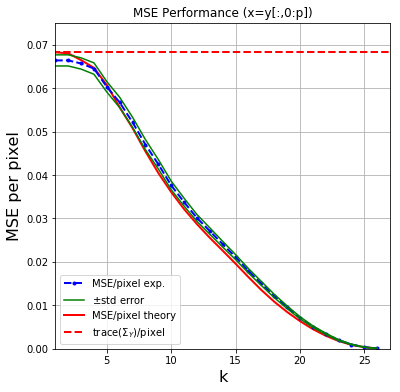

In [414]:
# Plot the figure
plt.figure(figsize=(6,6))
thmse_line, = plt.plot(cut[1:27], mseth[0,1:27],'r-',linewidth=2, label='MSE/pixel theory')
exmse_line, = plt.plot(cut[1:27],testmseL[0,1:27],'b.--',linewidth=2, label='MSE/pixel exp.')
stderr_line, = plt.plot(cut[1:27],testmseL[0,1:27] + teststerL[0,1:27], 'g-', label='std error')
plt.plot(cut[1:27],testmseL[0,1:27] - teststerL[0,1:27], 'g-')
limit_line, = plt.plot([0, 27],[EnY/numpx, EnY/numpx],'r--',linewidth=2, label='trace($\Sigma_Y$)/pixel')
plt.legend([exmse_line, stderr_line, thmse_line, limit_line], ['MSE/pixel exp.', '$\pm$std error', 'MSE/pixel theory', 'trace($\Sigma_Y$)/pixel'], loc=3)
plt.grid('on')
plt.axis([1, 27, 0, 1.1*EnY/numpx])
plt.xlabel('k',fontsize=16)
plt.ylabel('MSE per pixel',fontsize=16)
plt.title('MSE Performance (x=y[:,0:p])')
plt.show()      